<a href="https://colab.research.google.com/github/curiasuncc/4105-Intro-To-ML/blob/main/HW1SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#training set 436 values (80%)
df = pd.read_csv('/content/Housing.csv',nrows=436)
df.head() # To get first n rows from the dataset default value of n is 5 
TRAIN=len(df) 
print(TRAIN) 
#evaluation set 109 values (20%)
dg = pd.read_csv('/content/Housing.csv',skiprows=436)
dg.head()
EVAL=len(dg)
print(EVAL)

436
109


In [27]:
#importing the necessary variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv('/content/Housing.csv')
print("CSV File Shape")
print(df.shape)
df.head()

CSV File Shape
(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [29]:
svar_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
'airconditioning', 'prefarea']
def binary_mapping(x):
  return x.map({'yes':1, 'no':0})
df[svar_list] = df[svar_list].apply(binary_mapping)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [30]:
def get_modified_inputs(X):
  x_0 = np.ones([X.shape[0], 1])
  inputs= np.concatenate((x_0, X), axis = -1)
  return inputs
def compute_cost(X, y, theta):
  m= X.shape[0]
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [31]:
def compute_cost_regularized(X, y, theta, lamda):
  m= X.shape[0]
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  sqrErrors = np.sum(sqrErrors)
  reg_term = lamda * np.sum(np.square(theta))
  J = 1 / (2 * m) * (sqrErrors + reg_term)
  return J
def gradient_decsent(X_train, y_train, X_test, y_test, lr, n_epochs, lamda =
None):
  thetas = np.zeros([X_train.shape[1], 1])
  train_losses = []
  test_losses = []
  train_cost_history = np.zeros(n_epochs)
  test_cost_history = np.zeros(n_epochs)
  m=X_train.shape[0]
  for i in range(n_epochs):
    predictions = X_train.dot(thetas)
    errors = np.subtract(predictions, y_train)
    sum_delta = (lr / m) * X_train.transpose().dot(errors);
    thetas = thetas - sum_delta;
    if lamda==None:
      train_loss = compute_cost(X_train, y_train, thetas)
      train_cost_history[i] = train_loss
    if lamda!=None:
     train_loss = compute_cost_regularized(X_train, y_train, thetas, lamda)
     train_cost_history[i] = train_loss
    test_loss = compute_cost(X_test, y_test, thetas)
    test_cost_history[i] = test_loss
    if i % 10 == 0:
       print('Epoch %d, Train Loss %f' % (i, float(train_loss)))
       print('Epoch %d, Test Loss %f' % (i, float(test_loss)))
  return thetas, train_cost_history, test_cost_history

In [32]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
#num_vars = ['area', 'bedrooms', 'bathrooms', 'stories','price']
data = df[num_vars]
target_column = 'price' # Target to predict
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()
print("Input shape: "+ str(inputs.shape))
print("Target shape: "+ str(targets.shape))

Input shape: (545, 5)
Target shape: (545, 1)


In [33]:
inputs = get_modified_inputs(inputs)
print(inputs.shape)

(545, 6)


In [34]:
thetas = np.zeros([inputs.shape[1], 1])
thetas

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets,
test_size=0.20, random_state=42)

In [36]:
n_epochs= 50
thetas, train_cost_history, test_cost_history = gradient_decsent(X_train,
y_train, X_test, y_test, n_epochs=n_epochs, lr=0.00000001)

Epoch 0, Train Loss 6777140707185.933594
Epoch 0, Test Loss 8665197596670.137695
Epoch 10, Train Loss 1592129227130.803467
Epoch 10, Test Loss 2073497921411.736572
Epoch 20, Train Loss 1589377256837.419922
Epoch 20, Test Loss 2034921359584.095947
Epoch 30, Train Loss 1589375371177.942139
Epoch 30, Test Loss 2034092427267.851318
Epoch 40, Train Loss 1589374944914.050537
Epoch 40, Test Loss 2034072983332.556396


In [37]:
print("Final Theta values:")
print(thetas)

Final Theta values:
[[3.31337635e-01]
 [8.37930719e+02]
 [1.12411774e+00]
 [5.60384720e-01]
 [8.43094184e-01]
 [2.62278385e-01]]


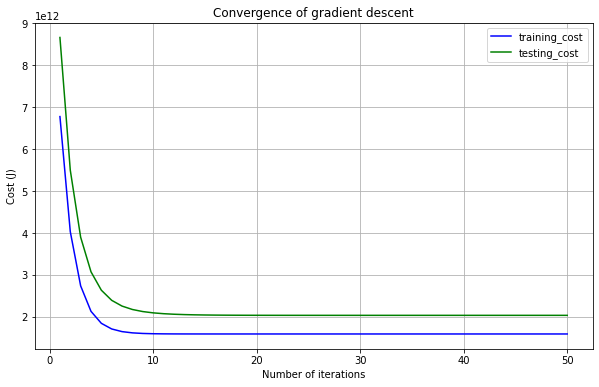

In [38]:
plt.plot(range(1, n_epochs + 1),train_cost_history, color='blue', 
label='training_cost')
plt.plot(range(1, n_epochs + 1),test_cost_history, color='green', label =
'testing_cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()